1. Load the dataset and make your preprocessing like normalizing the data.
2. Apply t-SNE to the data by setting n_components=2.
3. Using the two-dimensional t-SNE representation, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.
4. Do you think t-SNE solution is satisfactory? Can you distinguish between different classes easily? Which one has done a better job: t-SNE or the PCA you applied in the assignment of the previous checkpoint?
5. Now, play with the different perplexity values and apply t-SNE for each of them. Which perplexity value is the best one in terms of the two-dimensional representation clarity?

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

1. Load the dataset and make your preprocessing like normalizing the data.

In [2]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


2. Apply t-SNE to the data by setting n_components=2.

In [7]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 2.702s...
[t-SNE] Computed neighbors for 10000 samples in 153.096s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.836760
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.477539
[t-SNE] KL divergence after 300 iterations: 2.502546


3. Using the two-dimensional t-SNE representation, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.

In [9]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

4. Do you think t-SNE solution is satisfactory? Can you distinguish between different classes easily? Which one has done a better job: t-SNE or the PCA you applied in the assignment of the previous checkpoint?

While I wouldn't say t-SNE is satisfactory, there are definitely a few clusters that are distinguishable from one another. It performs better than PCA in which no clusters were distinguishable.

Cluster Graph with PCA


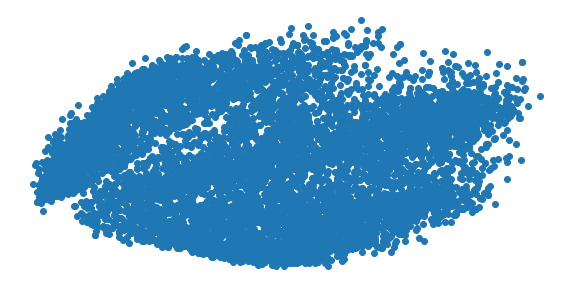

Cluster Graph with t-SNE


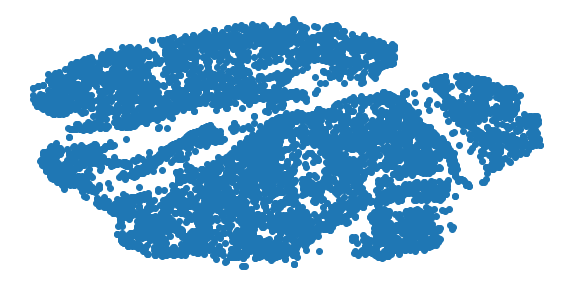

In [14]:
print('Cluster Graph with PCA')
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print('Cluster Graph with t-SNE')
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

5. Now, play with the different perplexity values and apply t-SNE for each of them. Which perplexity value is the best one in terms of the two-dimensional representation clarity?

Looking at the uncolored graphs, using a perplexity of 30 or 40 creates more distinguishable clusters than perplexities of other values.

In [15]:
tsne_30 = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results_p30 = tsne.fit_transform(X)

tsne_40 = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results_p40 = tsne.fit_transform(X)

tsne_50 = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results_p50 = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 2.902s...
[t-SNE] Computed neighbors for 10000 samples in 186.455s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.836760
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.440453
[t-SNE] KL divergence after 300 iterations: 2.493729
[t-SNE] Computing 121 n

In [17]:
tsne_20 = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=300)
tsne_results_p20 = tsne.fit_transform(X)

tsne_10 = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
tsne_results_10 = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 4.436s...
[t-SNE] Computed neighbors for 10000 samples in 278.951s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.836760
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.465843
[t-SNE] KL divergence after 300 iterations: 2.503018
[t-SNE] Computing 121 n

Cluster Graph with perplexity=10


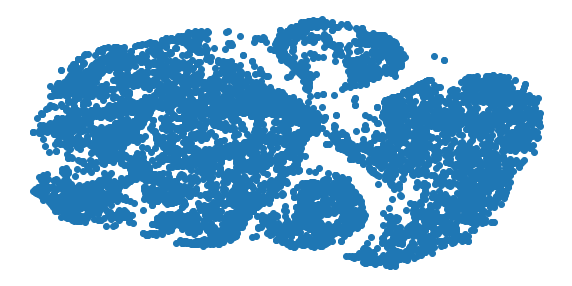

Cluster Graph with perplexity=20


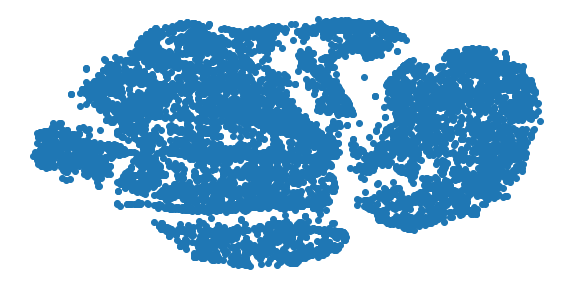

Cluster Graph with perplexity=30


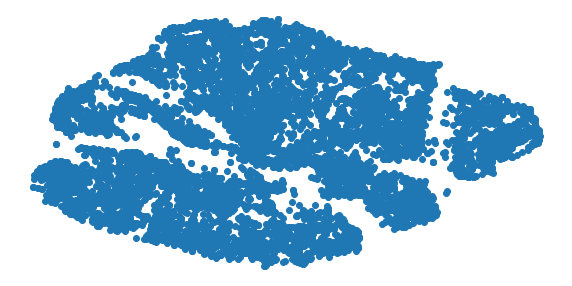

Cluster Graph with perplexity=40


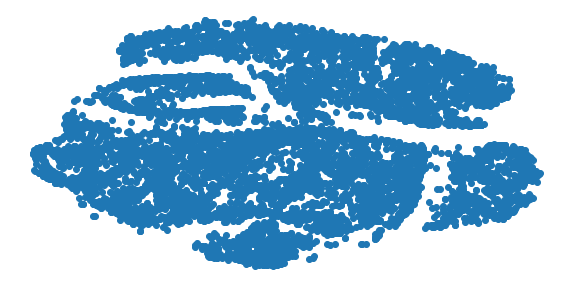

Cluster Graph with perplexity=50


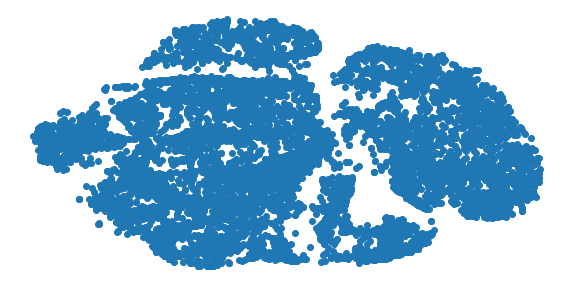

In [19]:
print('Cluster Graph with perplexity=10')
plt.figure(figsize=(10,5))
plt.scatter(tsne_results_10[:, 0], tsne_results_10[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print('Cluster Graph with perplexity=20')
plt.figure(figsize=(10,5))
plt.scatter(tsne_results_p20[:, 0], tsne_results_p20[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print('Cluster Graph with perplexity=30')
plt.figure(figsize=(10,5))
plt.scatter(tsne_results_p30[:, 0], tsne_results_p30[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print('Cluster Graph with perplexity=40')
plt.figure(figsize=(10,5))
plt.scatter(tsne_results_p40[:, 0], tsne_results_p40[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print('Cluster Graph with perplexity=50')
plt.figure(figsize=(10,5))
plt.scatter(tsne_results_p50[:, 0], tsne_results_p50[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()